<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
Exploratory data analysis
</div>

## Import libraries

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Read data from file

In [2]:
student_df = pd.read_csv('../data/student_processed.csv')\
    
student_df.head(5)

,School,Sex,Age,Address,Family size,Parent's cohabitation status,Mother's education,Father's education,Mother's job,Father's job,...,Family relationships,Free time at school,Going out with friends,Workday alcohol consumption,Weekend alcohol consumption,Current health status,School absences,First period grade,Second period grade,Final grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### How does age impact the drinking habits of students between male and female?

- In order to answer this question, I will compare each age between male and female students. Group bar chart might be a good option to do so.

- First, I need to find the columns which are the unique values of `Age` column

In [103]:
# Get unique values of Age column
unique_age_values = student_df['Age'].unique()

unique_age_values = sorted(unique_age_values)

unique_age_values

[15, 16, 17, 18, 19, 20, 21, 22]

- Then, group by `Sex` to find out the distribution of scent for each gender.

In [104]:
male = np.empty((0))
female = np.empty((0))

for age in unique_age_values:
    # Filter dataframe with each age
    age_df = student_df[student_df['Age'] == age]
    
    # Count number of each unique sex values
    value_counts = age_df['Sex'].value_counts().reset_index()
    
    sex = value_counts['Sex'].tolist()
    count_values = value_counts['count'].tolist()

    # IF there is no female or male student
    if (len(sex) != 2):
        if (sex[0] == 'M'):
            female = np.append(female, 0).astype(int)
            male = np.append(male, count_values[0]).astype(int)
            break
        else:
            male = np.append(male, 0).astype(int)
            female = np.append(female, count_values[0]).astype(int)
            break
    
    # Index 0 is F and index 1 is M because of alphabet order
    female = np.append(female, count_values[0]).astype(int)
    male = np.append(male, count_values[1]).astype(int)

row_values = [male, female]
index_values = ['Male', 'Female']

sex_age_df = pd.DataFrame(row_values, columns=unique_age_values, index=index_values)

sex_age_df

,15,16,17,18,19,20,21,22
Male,55,72,66,56,13,2,1,1
Female,57,105,113,84,19,4,1,0


- Visualize the result in a group bar chart. Groups are scents. In each group, there will be 2 columns (`F` and `M`)

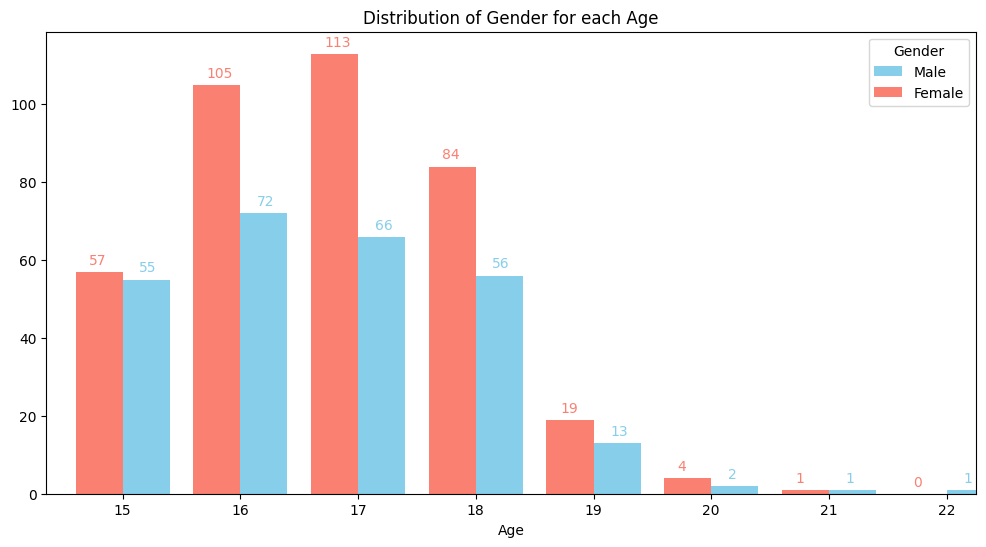

In [113]:
draw_df = sex_age_df.T

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for males
draw_df['Male'].plot(kind='bar', position=0, color='skyblue', width=0.4, ax=ax, label='Male')

# Bar plot for females
draw_df['Female'].plot(kind='bar', position=1, color='salmon', width=0.4, ax=ax, label='Female')

# Display values on top of the bars
for i, value in enumerate(draw_df['Male']):
    # plt.text(horizontal, vertical, value, color)
    plt.text(i + 0.14, value + 2, str(value), color='skyblue')

for i, value in enumerate(draw_df['Female']):
    plt.text(i - 0.285, value + 2, str(value), color='salmon')

ax.set_xlabel('Age')
ax.set_title('Distribution of Gender for each Age')
plt.legend(title='Gender')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=0)

plt.show()

- From the bar chart we can see that mostly in each age group, the number of female students is higher than male students in drinking alcohol habits.
